# 1. Introduction

Nama : Dery Rai 

RMT :34

Notebook ini ditujukan untuk menganalisa dan memberikan sebuah prediksi harga rekomendasi terhadap harga rumah yang akan diprediksi nantinya

|Column|Description|
|:----:|:----------|
| `area` | Area spesifik sebuah rumah |
| `city` | Kota dimana rumah berada |
| `lattitude` | Garis lintang sebuah rumah |
| `longitude` | Garis bujur sebuah rumah |
| `property_type` | Jenis properti |
| `bedrooms` | Jumlah kamar tidur |
| `bathrooms` | Jumlah kamar mandi |
| `land_area` | Luas tanah (m<sup>2</sup>) |
| `building_area` | Luas bangunan (m<sup>2</sup>) |
| `floors` | Jumlah lantai/tingkatan rumah |
| `maid_bedrooms` | Jumlah kamar tidur pembantu |
| `maid_bathrooms` | Jumlah kamar mandi pembantu |
| `certificate` | Jenis sertifikat bangunan |
| `voltage` | Daya listrik sebuah rumah |
| `building_age` | Usia bangunan |
| `year` | Tahun rumah tersebut dibangun |
| `condition` | Kondisi terkini sebuah rumah |
| `garage` | Apakah rumah tersebut memiliki garasi mobil atau tidak (`1` : Iya, `0` : Tidak) |
| `carport` | Apakah rumah tersebut memiliki carport atau tidak (`1` : Iya, `0` : Tidak) |
| `price` | Harga rumah |

# 2. Library

In [2021]:
# For basic use
import pandas as pd
import numpy as np

# For visualize
import matplotlib.pyplot as plt
import seaborn as sns

# For algorithms
import sklearn
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, r2_score

# Libraries untuk save model
import pickle
import json

Library diatas adalah library yang digunakan dalam analisa sebuah dataset yang dilakukan

# 3. Data Loading

In [2022]:
df_ori=pd.read_csv('house-price-v2.csv')
df =df_ori.copy()

In [2023]:
df #pemanggilan data

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport,price
0,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,4.0,239.0,272.0,2.0,0.0,1.0,shm - sertifikat hak milik,4400 mah,5.0,2017.0,bagus,0,0,2.990000e+09
1,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,2.0,55.0,69.0,2.0,0.0,0.0,hgb - hak guna bangunan,2200 mah,6.0,2016.0,bagus,0,1,1.270000e+09
2,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,119.0,131.0,2.0,1.0,1.0,hgb - hak guna bangunan,2200 mah,1.0,2021.0,bagus,1,1,1.950000e+09
3,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,180.0,174.0,2.0,1.0,1.0,shm - sertifikat hak milik,3500 mah,6.0,2016.0,bagus sekali,1,0,3.300000e+09
4,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,3.0,328.0,196.0,2.0,1.0,1.0,shm - sertifikat hak milik,3500 mah,9.0,2013.0,bagus,1,1,4.500000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,Jombang,Tangerang,-6.296615,106.704601,rumah,2.0,1.0,72.0,36.0,1.0,0.0,0.0,shm - sertifikat hak milik,1300 mah,0.0,2022.0,baru,1,1,5.880000e+08
3030,Lengkong Kulon,Tangerang,-6.283454,106.638775,rumah,3.0,2.0,85.0,60.0,2.0,0.0,0.0,shm - sertifikat hak milik,1300 mah,0.0,2022.0,baru,0,1,7.850000e+08
3031,Lengkong Kulon,Tangerang,-6.283454,106.638775,rumah,3.0,2.0,78.0,60.0,2.0,0.0,0.0,shm - sertifikat hak milik,1300 mah,0.0,2022.0,baru,0,1,7.550000e+08
3032,BSD Provance Parkland,Tangerang,-6.288237,106.665859,rumah,3.0,2.0,60.0,65.0,2.0,0.0,0.0,shm - sertifikat hak milik,2200 mah,0.0,2022.0,baru,0,1,8.000000e+08


terdapat 3034 baris dengan 20 column yang didapat dari dataset sebuah penjualan property

In [2024]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034 entries, 0 to 3033
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            3034 non-null   object 
 1   city            3034 non-null   object 
 2   lattitude       3034 non-null   float64
 3   logitude        3034 non-null   float64
 4   property_type   3034 non-null   object 
 5   bedrooms        3007 non-null   float64
 6   bathrooms       3012 non-null   float64
 7   land_area       3034 non-null   float64
 8   building_area   3034 non-null   float64
 9   floors          3033 non-null   float64
 10  maid_bedrooms   3034 non-null   float64
 11  maid_bathrooms  3034 non-null   float64
 12  certificate     2937 non-null   object 
 13  voltage         3034 non-null   object 
 14  building_age    3034 non-null   float64
 15  year            3034 non-null   float64
 16  condition       3034 non-null   object 
 17  garage          3034 non-null   i

dari info yang didapat pada kolom bedrooms,bathrooms,floors,certificate didapatkan missing value, dan pada kolom tahun tipe datanya float yang harusnya integer

In [2025]:
df.duplicated().sum() # pengecekan data duplikat


183

In [2026]:
df.drop_duplicates(inplace=True) # mendrop data duplikat

In [2027]:
df.describe() # pemanggilan central tendency pada tiap column

,lattitude,logitude,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,building_age,year,garage,carport,price
count,2851.000000,2851.000000,2825.000000,2830.000000,2851.000000,2851.000000,2850.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2.851000e+03
mean,-6.324044,106.789937,3.247434,2.544876,189.763942,176.353911,1.756140,0.490004,0.376359,4.302701,2017.697299,0.451771,0.830586,3.880244e+09
std,0.126918,0.170825,1.914612,1.992368,355.425494,205.080053,0.626858,0.660798,0.532181,5.560316,5.560316,0.497756,0.375183,1.351379e+10
min,-6.894828,106.402315,1.000000,1.000000,12.000000,18.000000,1.000000,0.000000,0.000000,0.000000,1970.000000,0.000000,0.000000,4.200000e+07
25%,-6.397933,106.687295,2.000000,2.000000,72.000000,63.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,1.000000,7.980000e+08
50%,-6.300733,106.799954,3.000000,2.000000,105.000000,110.000000,2.000000,0.000000,0.000000,3.000000,2019.000000,0.000000,1.000000,1.450000e+09
75%,-6.235202,106.874766,4.000000,3.000000,180.000000,200.000000,2.000000,1.000000,1.000000,7.000000,2022.000000,1.000000,1.000000,3.500000e+09
max,-6.102478,109.771691,57.000000,57.000000,8000.000000,3000.000000,5.000000,6.000000,5.000000,52.000000,2022.000000,1.000000,1.000000,5.800000e+11


In [2028]:
# merubah tipe data
df['maid_bedrooms'] = df['maid_bedrooms'].astype(int)
df['maid_bathrooms'] = df['maid_bathrooms'].astype(int)
df['year'] = df['year'].astype(int)

In [2029]:
df # pengecekan ulang

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport,price
0,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,4.0,239.0,272.0,2.0,0,1,shm - sertifikat hak milik,4400 mah,5.0,2017,bagus,0,0,2.990000e+09
1,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,2.0,55.0,69.0,2.0,0,0,hgb - hak guna bangunan,2200 mah,6.0,2016,bagus,0,1,1.270000e+09
2,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,119.0,131.0,2.0,1,1,hgb - hak guna bangunan,2200 mah,1.0,2021,bagus,1,1,1.950000e+09
3,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,180.0,174.0,2.0,1,1,shm - sertifikat hak milik,3500 mah,6.0,2016,bagus sekali,1,0,3.300000e+09
4,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,3.0,328.0,196.0,2.0,1,1,shm - sertifikat hak milik,3500 mah,9.0,2013,bagus,1,1,4.500000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,Jombang,Tangerang,-6.296615,106.704601,rumah,2.0,1.0,72.0,36.0,1.0,0,0,shm - sertifikat hak milik,1300 mah,0.0,2022,baru,1,1,5.880000e+08
3030,Lengkong Kulon,Tangerang,-6.283454,106.638775,rumah,3.0,2.0,85.0,60.0,2.0,0,0,shm - sertifikat hak milik,1300 mah,0.0,2022,baru,0,1,7.850000e+08
3031,Lengkong Kulon,Tangerang,-6.283454,106.638775,rumah,3.0,2.0,78.0,60.0,2.0,0,0,shm - sertifikat hak milik,1300 mah,0.0,2022,baru,0,1,7.550000e+08
3032,BSD Provance Parkland,Tangerang,-6.288237,106.665859,rumah,3.0,2.0,60.0,65.0,2.0,0,0,shm - sertifikat hak milik,2200 mah,0.0,2022,baru,0,1,8.000000e+08


In [2030]:
df.info() # pengecekan ulang

<class 'pandas.core.frame.DataFrame'>
Index: 2851 entries, 0 to 3033
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            2851 non-null   object 
 1   city            2851 non-null   object 
 2   lattitude       2851 non-null   float64
 3   logitude        2851 non-null   float64
 4   property_type   2851 non-null   object 
 5   bedrooms        2825 non-null   float64
 6   bathrooms       2830 non-null   float64
 7   land_area       2851 non-null   float64
 8   building_area   2851 non-null   float64
 9   floors          2850 non-null   float64
 10  maid_bedrooms   2851 non-null   int32  
 11  maid_bathrooms  2851 non-null   int32  
 12  certificate     2756 non-null   object 
 13  voltage         2851 non-null   object 
 14  building_age    2851 non-null   float64
 15  year            2851 non-null   int32  
 16  condition       2851 non-null   object 
 17  garage          2851 non-null   int64 

# 4.EDA

## 4.1 Soal

### 4.1.1 Pengelempokan rumah

In [2031]:
df

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport,price
0,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,4.0,239.0,272.0,2.0,0,1,shm - sertifikat hak milik,4400 mah,5.0,2017,bagus,0,0,2.990000e+09
1,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,2.0,55.0,69.0,2.0,0,0,hgb - hak guna bangunan,2200 mah,6.0,2016,bagus,0,1,1.270000e+09
2,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,119.0,131.0,2.0,1,1,hgb - hak guna bangunan,2200 mah,1.0,2021,bagus,1,1,1.950000e+09
3,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,180.0,174.0,2.0,1,1,shm - sertifikat hak milik,3500 mah,6.0,2016,bagus sekali,1,0,3.300000e+09
4,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,3.0,328.0,196.0,2.0,1,1,shm - sertifikat hak milik,3500 mah,9.0,2013,bagus,1,1,4.500000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,Jombang,Tangerang,-6.296615,106.704601,rumah,2.0,1.0,72.0,36.0,1.0,0,0,shm - sertifikat hak milik,1300 mah,0.0,2022,baru,1,1,5.880000e+08
3030,Lengkong Kulon,Tangerang,-6.283454,106.638775,rumah,3.0,2.0,85.0,60.0,2.0,0,0,shm - sertifikat hak milik,1300 mah,0.0,2022,baru,0,1,7.850000e+08
3031,Lengkong Kulon,Tangerang,-6.283454,106.638775,rumah,3.0,2.0,78.0,60.0,2.0,0,0,shm - sertifikat hak milik,1300 mah,0.0,2022,baru,0,1,7.550000e+08
3032,BSD Provance Parkland,Tangerang,-6.288237,106.665859,rumah,3.0,2.0,60.0,65.0,2.0,0,0,shm - sertifikat hak milik,2200 mah,0.0,2022,baru,0,1,8.000000e+08


In [2032]:
df.voltage.unique()

array(['4400 mah', '2200 mah', '3500 mah', '1300 mah', '5500 mah',
       '6600 mah', '7700 mah', '3300 mah', '7600 mah', '900 mah',
       '47500 mah', '11000 mah', '8000 mah', '450 mah', '10000 mah',
       '10600 mah', '53000 mah', '16500 mah', '13200 mah', '13900 mah',
       '17600 mah', '23000 mah', '41500 mah', '12700 mah', '13300 mah',
       '33000 mah', '24000 mah', '22000 mah', '9500 mah'], dtype=object)

In [2033]:
df['voltage'] = df['voltage'].str.replace('mah', '') # agar dapat dikelompokan data dihandling menjadi tipe integer dan penghapusan huruf dalam data
df['voltage'] = df['voltage'].astype(int)

agar dapat dikelompokan data dihandling menjadi tipe integer dan penghapusan huruf dalam data

In [2034]:
# Looping untuk membagi rumah ke dalam golongan berdasarkan daya listrik
def tentukan_golongan(daya):
    if 450 <= daya <= 2200:
        return 'R-1'
    elif 3300 <= daya <= 5500:
        return 'R-2'
    elif daya >= 6600:
        return 'R-3'
    else:
        return 'Tidak ada golongan'


# Menambahkan kolom kategori ke DataFrame yang sudah ada
df['golongan'] = df['voltage'].apply(tentukan_golongan)

In [2035]:
df.golongan.unique()

array(['R-2', 'R-1', 'R-3'], dtype=object)

pengecekan output hasil pengelompokan

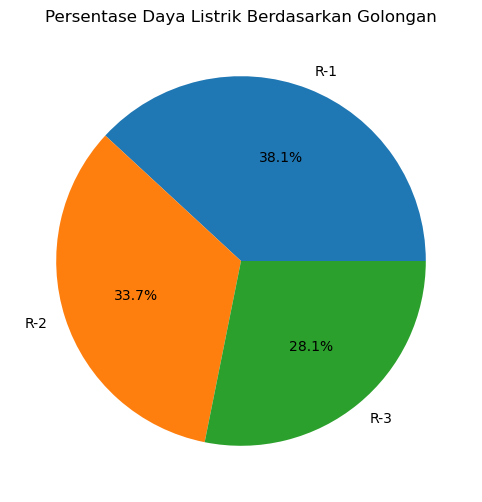

In [2036]:
# Mencoba membuat pie chart berdasarkan jumlah voltage per golongan
df_grouped = df.groupby(['golongan']).sum()

# Plotting pie chart
df_grouped.plot(kind='pie', y='voltage', autopct='%1.1f%%', legend=False, figsize=(8, 6))
plt.ylabel('')
plt.title('Persentase Daya Listrik Berdasarkan Golongan')
plt.show()

visualisasi yang didapat rumah dengan daya 450-2200 /R-1 lebih banyak dibanding rumah dengan daya listrik R-2/R-3

### 4.1.2 Pengelompokan rumah mewah

In [2037]:

# Filter rumah mewah dengan building_area >= 300 m2
rumah_mewah = df[df['building_area'] >= 300]
top_area = rumah_mewah.groupby('area').size().sort_values(ascending=False).head(5)
avg_price = rumah_mewah.groupby('area')['price'].mean().loc[top_area.index]


In [2038]:
top_area

area
Sentul City           66
Pantai Indah Kapuk    33
Kemang                23
BSD                   19
Alam Sutera           14
dtype: int64

5 area yang dinyatakan mewah berdasarkan kondisi memiliki luas lebih dari 300m2 

In [2039]:
avg_price

area
Sentul City           1.021667e+10
Pantai Indah Kapuk    2.020606e+10
Kemang                2.140435e+10
BSD                   1.420000e+10
Alam Sutera           1.078929e+10
Name: price, dtype: float64

Rata rata harga rumah yang berada di area area elite 

### 4.1.3 Rekomendasi

In [2040]:
def tentukan_golongan(tahun):
    if tahun <= 2000:
        return 'tua'
    elif tahun >= 2001:
        return 'baru'
    else:
        return 'Tidak ada golongan'

# Menambahkan kolom kategori ke DataFrame yang sudah ada
df['golongan_rumah'] = df['year'].apply(tentukan_golongan)


pengelompokan rumah rumah dibawah tahun 2000 menjadi rumah tua dan diatas 2001 menjadi rumah baru

In [2041]:

average_area= df[['golongan_rumah', 'building_area']].groupby(['golongan_rumah']).mean().reset_index()

# Mengurutkan hasil berdasarkan' dalam urutan menurun
sorted_average_area = average_area.sort_values(by='building_area', ascending=False)
sorted_average_area


,golongan_rumah,building_area
1,tua,298.569444
0,baru,173.187478


In [2042]:

average= df[['golongan_rumah', 'price']].groupby(['golongan_rumah']).mean().reset_index()

# Mengurutkan hasil berdasarkan' dalam urutan menurun
sorted_average = average.sort_values(by='price', ascending=False)

sorted_average

,golongan_rumah,price
1,tua,8.298542e+09
0,baru,3.765772e+09


Berdasarkan pengelompokan rumah tua dan rumah baru dan yang biasanya dijadikan patokan untuk membeli sebuah rumah yaitu luas bangunan dan harganya

didapat data bahwa rata rata dari rumah tua memiliki luas tanah diatas 300m yang diartikan terbilang mewah dan harga rumah tua yang diatas rata rata keseleruhan dari data yang didapat

maka saya merekomendasikan kepada pak slamet untuk tidak menyarankan membeli rumah yang tahun pembuatannya sebelum 2000 dikarnakan beberapa alasan:

•Harga yang tinggi belum menjamin sebuah kenyamanan tempat tinggal

•Dikarnakan umur bangunan yang sudah tua diperlukan maintenance lebih terhadap rumah tersebut

saya juga merekomendasikan kepada pak slamet untuk membeli rumah yang tahun pembuatannya sebelum 2000 dikarnakan alasan :

• Rumah yang luas cocok untuk dijadikan kumpul keluarga dengan sanak sodara

Namun dengan kondisi keuangan pak slamet yang terbatas saya merekomendasikan untuk tidak membelinya dikarnakan rumah tua ternyata lebih mahal dibandingkan rumah baru yang tahun pembuatannya diatas tahun 2000

## 4.3 Target

In [2043]:
df['price'].skew()

29.365347681720248

Text(0.5, 1.0, 'Histogram of price')

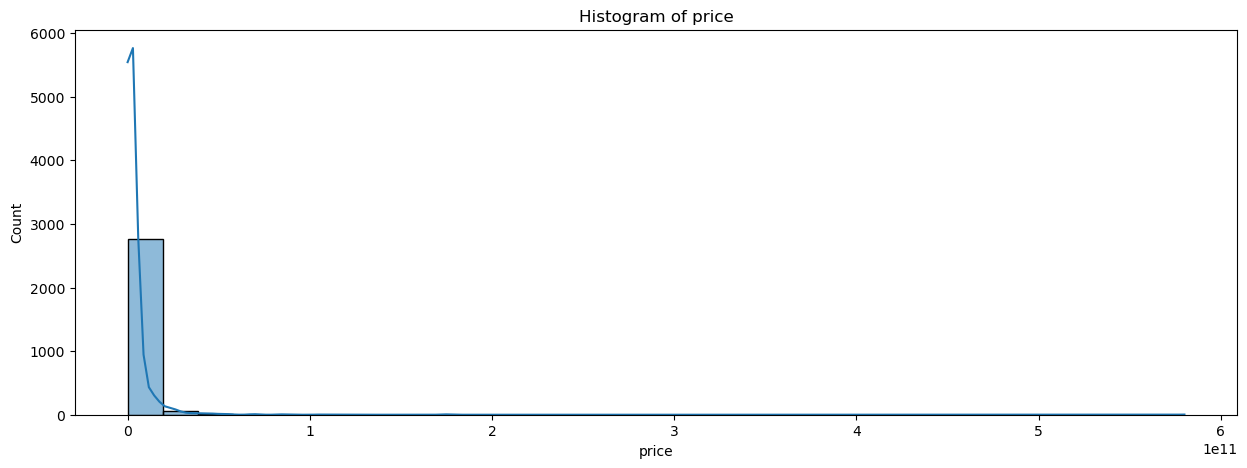

In [2044]:
plt.figure(figsize=(15,5))

sns.histplot(df['price'], kde=True,bins=30)
plt.title('Histogram of price')

dari diagram diatas data yang didapat distribusinya tidak normal dengan menujukan skewnessnya di angka 29

## 4.4 Numerical

In [2045]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2851 entries, 0 to 3033
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            2851 non-null   object 
 1   city            2851 non-null   object 
 2   lattitude       2851 non-null   float64
 3   logitude        2851 non-null   float64
 4   property_type   2851 non-null   object 
 5   bedrooms        2825 non-null   float64
 6   bathrooms       2830 non-null   float64
 7   land_area       2851 non-null   float64
 8   building_area   2851 non-null   float64
 9   floors          2850 non-null   float64
 10  maid_bedrooms   2851 non-null   int32  
 11  maid_bathrooms  2851 non-null   int32  
 12  certificate     2756 non-null   object 
 13  voltage         2851 non-null   int32  
 14  building_age    2851 non-null   float64
 15  year            2851 non-null   int32  
 16  condition       2851 non-null   object 
 17  garage          2851 non-null   int64 

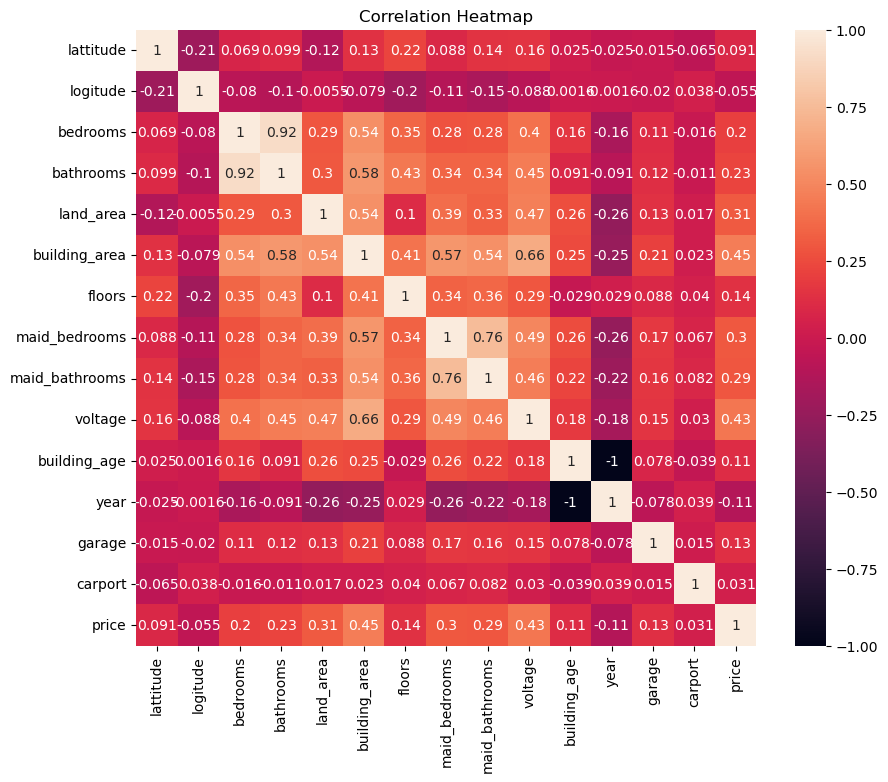

In [2046]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, ax=ax)
plt.title("Correlation Heatmap");

berdasarkan korelasi antara kolom dengan price diputuskan bahwa kolom lattitude,longitude,dan tidak akan saya masukan ke dalam model

## 4.5 Categorical

In [2047]:
df['city'].value_counts()

city
 Tangerang          708
 Bogor              681
 Bekasi             491
 Depok              426
 Jakarta Selatan    195
 Jakarta Barat      147
 Jakarta Utara       98
 Jakarta Timur       78
 Jakarta Pusat       27
Name: count, dtype: int64

In [2048]:
df['city'].unique()

array([' Bekasi', ' Bogor', ' Depok', ' Jakarta Barat',
       ' Jakarta Selatan', ' Jakarta Utara', ' Jakarta Timur',
       ' Jakarta Pusat', ' Tangerang'], dtype=object)

In [2049]:
df.groupby('city').mean('price')

,lattitude,logitude,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,voltage,building_age,year,garage,carport,price
city,,,,,,,,,,,,,,,
Bekasi,-6.252678,106.984025,2.923237,2.051867,114.441955,112.523422,1.509165,0.242363,0.197556,2262.729124,3.875764,2018.124236,0.413442,0.843177,1.244794e+09
Bogor,-6.496641,106.831901,2.992582,2.190265,260.071953,153.393539,1.540382,0.412628,0.311307,2517.621145,4.572687,2017.427313,0.421439,0.842878,2.524093e+09
Depok,-6.388356,106.816153,2.765957,2.072941,105.288732,96.387324,1.593897,0.314554,0.107981,2200.234742,2.896714,2019.103286,0.507042,0.880282,1.224948e+09
Jakarta Barat,-6.175534,106.715964,3.500000,3.013699,158.367347,237.925170,2.285714,0.768707,0.625850,3878.911565,5.414966,2016.585034,0.367347,0.687075,4.407537e+09
Jakarta Pusat,-6.179892,106.853612,3.555556,3.259259,303.703704,348.407407,2.037037,0.888889,0.518519,6974.074074,6.814815,2015.185185,0.555556,0.555556,1.874296e+10
Jakarta Selatan,-6.283700,106.807347,4.912821,4.323077,418.769231,401.179487,2.082474,1.276923,0.917949,7505.128205,7.200000,2014.800000,0.666667,0.882051,1.361789e+10
Jakarta Timur,-6.220452,106.893955,2.871795,2.487179,100.551282,117.320513,1.910256,0.307692,0.256410,2885.897436,2.910256,2019.089744,0.384615,0.705128,1.943705e+09
Jakarta Utara,-6.112066,106.772584,3.760417,3.500000,261.030612,462.234694,2.306122,0.887755,0.846939,6373.469388,4.826531,2017.173469,0.540816,0.806122,1.223158e+10
Tangerang,-6.257021,106.598275,3.448864,2.768137,164.265537,176.485876,1.929379,0.516949,0.466102,3367.937853,4.141243,2017.858757,0.423729,0.823446,4.309160e+09


In [2050]:
df['area'].value_counts()

area
Sentul City           220
Alam Sutera            96
Gading Serpong         86
Sawangan               71
Pantai Indah Kapuk     68
                     ... 
TB Simatupang           1
Cengkareng              1
Kayu Putih              1
Bojong Indah            1
Sudimara                1
Name: count, Length: 364, dtype: int64

In [2051]:
df['area'].unique()

array(['Summarecon Bekasi', 'Bekasi', 'Setu', 'Harapan Indah',
       'Bekasi Kota', 'Cibitung', 'Cibubur', 'Mustikajaya',
       'Jatisampurna', 'Jatiwarna', 'Pondok Gede', 'Jaka Setia',
       'Jati Asih', 'Grand Wisata', 'Jatibening', 'Bekasi Utara',
       'Rawalumbu', 'Tambun Selatan', 'Harapan Baru', 'Pondokmelati',
       'Babelan', 'Kemang Pratama', 'Bekasi Timur', 'Jatiwaringin',
       'Tarumajaya', 'Cikarang Selatan', 'Kebalen', 'Kayuringin Jaya',
       'Bintara', 'Jatirangga', 'Cikarang', 'Jati Mekar', 'Duta Harapan',
       'Jati Sari', 'Pejuang', 'Galaxy', 'Tanah Tinggi', 'Jaka Sampurna',
       'Bekasi Barat', 'Tambun Utara', 'Kaliabang', 'Mustikasari',
       'Cimuning', 'Caman', 'Cikunir', 'Satriajaya', 'Pondok Ungu',
       'Pekayon', 'Harapan Mulya', 'Harapan Jaya', 'Perwira',
       'Jatikramat', 'Jatimurni', 'Jatimelati', 'Karang Satria', 'Kranji',
       'Margahayu', 'Serang Baru', 'Duren Jaya', 'Jati Luhur', 'Jababeka',
       'Komsen', 'Jatiranggon', 'Narogong'

In [2052]:
df.groupby('area').mean('price')

,lattitude,logitude,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,voltage,building_age,year,garage,carport,price
area,,,,,,,,,,,,,,,
Alam Sutera,-6.262379,106.522024,4.021053,3.410526,174.843750,223.59375,2.104167,0.729167,0.84375,3800.0,2.072917,2019.927083,0.520833,0.875000,5.376354e+09
Ampera,-6.283659,106.819175,5.333333,5.333333,1094.666667,627.50000,1.166667,2.833333,1.50000,15100.0,9.833333,2012.166667,0.833333,0.833333,1.950000e+10
Angke,-6.145732,106.795015,5.000000,3.000000,160.000000,300.00000,2.000000,1.000000,1.00000,6600.0,46.000000,1976.000000,1.000000,1.000000,1.880000e+09
Antasari,-6.276194,106.808365,5.000000,4.000000,1211.000000,362.00000,1.000000,1.000000,1.00000,11000.0,14.000000,2008.000000,0.000000,0.000000,2.500000e+10
BSD,-6.300733,106.586126,3.738462,3.492308,210.369231,232.80000,2.169231,0.461538,0.40000,4420.0,3.600000,2018.400000,0.569231,0.876923,5.960308e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tigaraksa,-6.259875,106.469015,2.500000,1.500000,100.000000,51.00000,1.500000,0.000000,0.00000,1750.0,1.000000,2021.000000,0.500000,1.000000,5.500000e+08
Tirtajaya,-6.413393,106.828260,3.000000,2.000000,71.500000,70.00000,2.000000,0.000000,0.00000,2200.0,0.000000,2022.000000,0.000000,1.000000,9.130000e+08
Tomang,-6.172825,106.796655,4.000000,4.000000,346.000000,300.00000,2.000000,1.000000,1.00000,4400.0,6.000000,2016.000000,0.000000,1.000000,8.500000e+09


# 5. Feature Engineering

## 5.1 Handling Missing Value

In [2053]:
df.isnull().sum()

area               0
city               0
lattitude          0
logitude           0
property_type      0
bedrooms          26
bathrooms         21
land_area          0
building_area      0
floors             1
maid_bedrooms      0
maid_bathrooms     0
certificate       95
voltage            0
building_age       0
year               0
condition          0
garage             0
carport            0
price              0
golongan           0
golongan_rumah     0
dtype: int64

terdapat 4 kolom yang didapatkan missing value

In [2054]:
df[df.bedrooms.isnull()]

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,...,certificate,voltage,building_age,year,condition,garage,carport,price,golongan,golongan_rumah
19,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,NaN,NaN,164.0,155.0,1.0,...,shm - sertifikat hak milik,2200,12.0,2010,bagus,0,0,2.000000e+09,R-1,baru
51,Bekasi,Bekasi,-6.284978,106.970127,rumah,NaN,2.0,120.0,90.0,2.0,...,shm - sertifikat hak milik,2200,1.0,2021,baru,0,1,1.200000e+09,R-1,baru
96,Harapan Indah,Bekasi,-6.181752,106.973684,rumah,NaN,NaN,63.0,53.0,1.0,...,shm - sertifikat hak milik,2200,0.0,2022,baru,0,0,7.790000e+08,R-1,baru
108,Harapan Indah,Bekasi,-6.181752,106.973684,rumah,NaN,NaN,144.0,121.0,1.0,...,shm - sertifikat hak milik,2200,6.0,2016,bagus,0,0,2.170000e+09,R-1,baru
356,Bekasi Timur,Bekasi,-6.242993,107.018010,rumah,NaN,NaN,60.0,60.0,1.0,...,shm - sertifikat hak milik,900,9.0,2013,butuh renovasi,0,0,3.750000e+08,R-1,baru
383,Tarumajaya,Bekasi,-6.120970,107.000449,rumah,NaN,NaN,120.0,100.0,1.0,...,shm - sertifikat hak milik,2200,2.0,2020,bagus,0,1,5.500000e+08,R-1,baru
387,Cikarang Selatan,Bekasi,-6.332815,107.124733,rumah,NaN,NaN,60.0,36.0,1.0,...,shm - sertifikat hak milik,1300,0.0,2022,bagus,0,0,3.900000e+08,R-1,baru
430,Galaxy,Bekasi,-6.268268,106.970205,rumah,NaN,NaN,113.0,90.0,2.0,...,shm - sertifikat hak milik,2200,1.0,2021,baru,0,1,8.500000e+08,R-1,baru
450,Tambun Utara,Bekasi,-6.199685,107.062247,rumah,NaN,NaN,75.0,30.0,1.0,...,shm - sertifikat hak milik,1300,9.0,2013,butuh renovasi,0,0,1.800000e+08,R-1,baru
686,Sentul City,Bogor,-6.518350,106.851279,rumah,NaN,8.0,2916.0,400.0,3.0,...,"lainnya (ppjb,girik,adat,dll)",3300,8.0,2014,bagus,1,1,1.650000e+10,R-2,baru


In [2055]:
# Hapus baris yang mengandung NaN di kolom 'bedrooms ,bathrooms, dan floor'
df=df.dropna(subset=['bedrooms', 'bathrooms','floors'])

Alasan penghapusan missing value pada 3 kolom tersebut dikarnakan missing value yang ada hanya kurang dari 1% dari jumlah data yang didapat,jadi diputuskan untuk di drop

In [2056]:
# Hitung modus dari kolom 'certificate'
modus = df['certificate'].mode()[0]  # mode() mengembalikan Series, ambil elemen pertama
df['certificate'] = df['certificate'].fillna(modus)

C:\Users\IRFAN\AppData\Local\Temp\ipykernel_7884\2240512930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['certificate'] = df['certificate'].fillna(modus)


Penggantian missing value Nan pada kolom certificate dan diganti dengan modus beralasan karna tidak begitu berdampak pada hasil akhirnya nantinya

In [2057]:
df.isna().sum()

area              0
city              0
lattitude         0
logitude          0
property_type     0
bedrooms          0
bathrooms         0
land_area         0
building_area     0
floors            0
maid_bedrooms     0
maid_bathrooms    0
certificate       0
voltage           0
building_age      0
year              0
condition         0
garage            0
carport           0
price             0
golongan          0
golongan_rumah    0
dtype: int64

Data sudah bersih dari missing vallue

## 5.2 Feature Selection

### 5.2.1 Split feature x dan y

In [2058]:
y= df["price"]

# kolom fitur selain kolom target
X = df.drop(columns=["price","lattitude","logitude","golongan","golongan_rumah","area"], axis=1)

berdasarkan analisa yang didapat kolom yang akan saya gunakan dalam pembuatan model antara lain kolom area,city,porperty_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms dan maid bathrooms,certificate,voltage,building_age,year,condition,garage,carport dikarnakan adanya korelasi antara kolom kolom tersebut dengan target kolom yaitu price

sementara kolom yang saya drop antara lain lattitude,longitude,golongan,golongan_rumah dikarnakan kolom kolom tersebut sudah diwakili dengan kolom yang saya masukan atau korelasi antar kolom sama 

In [2059]:
X

,city,property_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport
0,Bekasi,rumah,4.0,4.0,239.0,272.0,2.0,0,1,shm - sertifikat hak milik,4400,5.0,2017,bagus,0,0
1,Bekasi,rumah,3.0,2.0,55.0,69.0,2.0,0,0,hgb - hak guna bangunan,2200,6.0,2016,bagus,0,1
2,Bekasi,rumah,3.0,3.0,119.0,131.0,2.0,1,1,hgb - hak guna bangunan,2200,1.0,2021,bagus,1,1
3,Bekasi,rumah,3.0,3.0,180.0,174.0,2.0,1,1,shm - sertifikat hak milik,3500,6.0,2016,bagus sekali,1,0
4,Bekasi,rumah,4.0,3.0,328.0,196.0,2.0,1,1,shm - sertifikat hak milik,3500,9.0,2013,bagus,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,Tangerang,rumah,2.0,1.0,72.0,36.0,1.0,0,0,shm - sertifikat hak milik,1300,0.0,2022,baru,1,1
3030,Tangerang,rumah,3.0,2.0,85.0,60.0,2.0,0,0,shm - sertifikat hak milik,1300,0.0,2022,baru,0,1
3031,Tangerang,rumah,3.0,2.0,78.0,60.0,2.0,0,0,shm - sertifikat hak milik,1300,0.0,2022,baru,0,1
3032,Tangerang,rumah,3.0,2.0,60.0,65.0,2.0,0,0,shm - sertifikat hak milik,2200,0.0,2022,baru,0,1


In [2060]:
print("fitur:", X.shape) # pengecekan baris dan kolom di fitur dan target
print("target:",y.shape)

fitur: (2821, 16)
target: (2821,)


## 5.2.2 Split train dan test

In [2061]:


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=27)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state=27)

### 5.2.3 Handling outlier

In [2062]:
#pengecekan skewness pada tiap tiap colom
print('Distribution of column `bedrooms`  : ', X_train['bedrooms'].skew())
print('Distribution of column `bathrooms` : ', X_train['bathrooms'].skew())
print('Distribution of column `land_area`  : ', X_train['land_area'].skew())
print('Distribution of column `building_area` : ', X_train['building_area'].skew())
print('Distribution of column `floors`  : ', X_train['floors'].skew())
print('Distribution of column `maid_bedrooms` : ', X_train['maid_bedrooms'].skew())
print('Distribution of column `maid_bathrooms`  : ', X_train['maid_bathrooms'].skew())
print('Distribution of column `voltage` : ', X_train['voltage'].skew())
print('Distribution of column `building_age`  : ', X_train['building_age'].skew())
print('Distribution of column `year` : ', X_train['year'].skew())
print('Distribution of column `garage`  : ', X_train['garage'].skew())
print('Distribution of column `carport` : ', X_train['carport'].skew())

Distribution of column `bedrooms`  :  15.920457809226525
Distribution of column `bathrooms` :  15.226190531500864
Distribution of column `land_area`  :  10.950732351309599
Distribution of column `building_area` :  4.742173442801151
Distribution of column `floors`  :  0.4016729207329048
Distribution of column `maid_bedrooms` :  1.6348125257229886
Distribution of column `maid_bathrooms`  :  1.2455292791409331
Distribution of column `voltage` :  5.605084504503361
Distribution of column `building_age`  :  3.01389561259636
Distribution of column `year` :  -3.0138956125963046
Distribution of column `garage`  :  0.22103025371583895
Distribution of column `carport` :  -1.837612145795767


normal distributin range skewness di angka 0.5 s/d -0.5 selebihnya dianggap skew distribution

data yang akan dihandling outliernya yaitu data yang skewnessnya lebih dari 5 atau mendekati 5

In [2063]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [2064]:
upper_boundary_bedrooms, lower_boundary_bedrooms = find_skewed_boundaries(X_train, 'bedrooms', 3)
upper_boundary_bedrooms, lower_boundary_bedrooms

(10.0, -4.0)

In [2065]:
print('Total rumah: {}'.format(len(X_train)))
print('rumah yang kamar tidurnya lebih dari 10   : {}'.format(len(X_train[X_train['bedrooms'] > upper_boundary_bedrooms])))
print('')
print('% rumah yang kamar tidurnya lebih dari 10   : {}'.format(len(X_train[X_train['bedrooms'] > upper_boundary_bedrooms])/len(X_train) * 100))

Total rumah: 1804
rumah yang kamar tidurnya lebih dari 10   : 8

% rumah yang kamar tidurnya lebih dari 10   : 0.4434589800443459


In [2066]:
upper_boundary_bathrooms, lower_boundary_bathrooms = find_skewed_boundaries(X_train, 'bathrooms', 3)
upper_boundary_bathrooms, lower_boundary_bathrooms

(6.0, -1.0)

In [2067]:
print('Total rumah: {}'.format(len(X_train)))
print('rumah yang kamar mandi lebih dari 6   : {}'.format(len(X_train[X_train['bathrooms'] > upper_boundary_bathrooms])))
print('')
print('% rumah yang kamar mandi lebih dari 6  : {}'.format(len(X_train[X_train['bathrooms'] > upper_boundary_bathrooms])/len(X_train) * 100))

Total rumah: 1804
rumah yang kamar mandi lebih dari 6   : 24

% rumah yang kamar mandi lebih dari 6  : 1.3303769401330376


In [2068]:
upper_boundary_land_area, lower_boundary_land_area = find_skewed_boundaries(X_train, 'land_area', 3)
upper_boundary_land_area, lower_boundary_land_area

(504.0, -252.0)

In [2069]:
print('Total rumah: {}'.format(len(X_train)))
print('rumah yang luas tanah lebih dari 504 : {}'.format(len(X_train[X_train['land_area'] > upper_boundary_land_area])))
print('')
print('% rumah yang kamar mandi lebih dari 504  : {}'.format(len(X_train[X_train['land_area'] > upper_boundary_land_area])/len(X_train) * 100))

Total rumah: 1804
rumah yang luas tanah lebih dari 504 : 123

% rumah yang kamar mandi lebih dari 504  : 6.8181818181818175


In [2070]:
upper_boundary_building_area, lower_boundary_building_area = find_skewed_boundaries(X_train, 'building_area', 3)
upper_boundary_building_area, lower_boundary_building_area

(611.0, -348.0)

In [2071]:
print('Total rumah: {}'.format(len(X_train)))
print('rumah yang luas bangunan lebih dari 611 : {}'.format(len(X_train[X_train['building_area'] > upper_boundary_building_area])))
print('')
print('% rumah yang luas bangunan lebih dari 611  : {}'.format(len(X_train[X_train['building_area'] > upper_boundary_building_area])/len(X_train) * 100))

Total rumah: 1804
rumah yang luas bangunan lebih dari 611 : 70

% rumah yang luas bangunan lebih dari 611  : 3.8802660753880267


In [2072]:
upper_boundary_voltage, lower_boundary_voltage = find_skewed_boundaries(X_train, 'voltage', 3)
upper_boundary_voltage, lower_boundary_voltage

(7400.0, -1700.0)

In [2073]:
print('Total rumah: {}'.format(len(X_train)))
print('rumah yang daya lebih dari 7400 mah : {}'.format(len(X_train[X_train['voltage'] > upper_boundary_voltage])))
print('')
print('% rumah yang daya lebih dari 7400 mah  : {}'.format(len(X_train[X_train['voltage'] > upper_boundary_voltage])/len(X_train) * 100))

Total rumah: 1804
rumah yang daya lebih dari 7400 mah : 131

% rumah yang daya lebih dari 7400 mah  : 7.261640798226164


### 5.2.4 Trimming

In [2074]:
# Flag the outliers in category `bedrooms`
outliers_bedrooms = np.where(X_train['bedrooms'] > upper_boundary_bedrooms, True,
                       np.where(X_train['bedrooms'] < lower_boundary_bedrooms, True, False))

# Flag the outliers in category `bathrooms`
outliers_bathrooms = np.where(X_train['bathrooms'] > upper_boundary_bathrooms, True,
                       np.where(X_train['bathrooms'] < lower_boundary_bathrooms, True, False))
# Flag the outliers in category `building area`
outliers_building_area = np.where(X_train['building_area'] > upper_boundary_building_area, True,
                       np.where(X_train['building_area'] < lower_boundary_building_area, True, False))

# Trimming the dataset
X_train_trimmed = X_train.loc[~(outliers_bedrooms + outliers_bathrooms+ outliers_building_area)]
y_train_trimmed = y_train.loc[~(outliers_bedrooms + outliers_bathrooms + outliers_building_area)]
print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_trimmed.shape)

print('Size dataset - Before trimming : ', y_train.shape)
print('Size dataset - After trimming  : ', y_train_trimmed.shape)

Size dataset - Before trimming :  (1804, 16)
Size dataset - After trimming  :  (1724, 16)
Size dataset - Before trimming :  (1804,)
Size dataset - After trimming  :  (1724,)


Trimming dilakukan ke outlier yang jumlahnya sedikit atau memiliki presentase kecil sehingga tidak begitu merubah hasil akhirnya

### 5.2.5 Capping

proses melakukan handling outlier pada kolom yang memiliki % outliernya diatas 5%

In [2075]:
# Capping the skewed distribution on column voltage
winsoriser_voltage = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['voltage'])

X_train__trimmed_capped = winsoriser_voltage.fit_transform(X_train_trimmed)
X_test_capped = winsoriser_voltage.transform(X_test)

In [2076]:
# Capping the skewed distribution on column land area
winsoriser_land_area = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['land_area'])

X_train_trimmed_capped = winsoriser_land_area.fit_transform(X_train__trimmed_capped)
X_test_capped = winsoriser_land_area.transform(X_test_capped)

capping dilakukan pada kolom yang memiliki outlier lebih dari 5%

### 5.2.6 split categorical dan numerical

In [2077]:
# cek kolom numerik dan kategorik
num_col = X_train__trimmed_capped.select_dtypes(include=np.number).columns.tolist()
cat_col = X_train__trimmed_capped.select_dtypes(include=['object']).columns.tolist()

print(f" kolom numerik :{num_col}")
print(f"kolom kategori : {cat_col}")

 kolom numerik :['bedrooms', 'bathrooms', 'land_area', 'building_area', 'floors', 'maid_bedrooms', 'maid_bathrooms', 'voltage', 'building_age', 'year', 'garage', 'carport']
kolom kategori : ['city', 'property_type', 'certificate', 'condition']


pemagian kolom fitur menjadi 2 bagian numerik dan kategori

In [2078]:
# Ke Train-set
X_train__trimmed_capped_num = X_train__trimmed_capped[num_col]
X_train__trimmed_capped_cat = X_train__trimmed_capped[cat_col]
# Ke Test set
X_test_num  =X_test[num_col]
X_test_cat =X_test[cat_col]


### 5.2.4 Feature Scaling

In [2079]:
X_train__trimmed_capped.describe()

,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,voltage,building_age,year,garage,carport
count,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000
mean,3.096868,2.368329,162.184455,145.685035,1.736079,0.449536,0.350348,2830.249420,4.189095,2017.810905,0.430394,0.835847
std,0.994128,1.066862,239.171914,117.048710,0.599340,0.602090,0.495124,1802.570389,5.744631,5.744631,0.495275,0.370522
min,1.000000,1.000000,12.000000,18.000000,1.000000,0.000000,0.000000,450.000000,0.000000,1970.000000,0.000000,0.000000
25%,2.000000,2.000000,72.000000,62.000000,1.000000,0.000000,0.000000,1300.000000,0.000000,2015.000000,0.000000,1.000000
50%,3.000000,2.000000,105.000000,100.000000,2.000000,0.000000,0.000000,2200.000000,2.000000,2020.000000,0.000000,1.000000
75%,4.000000,3.000000,162.000000,186.000000,2.000000,1.000000,1.000000,3500.000000,7.000000,2022.000000,1.000000,1.000000
max,8.000000,6.000000,5025.000000,610.000000,4.000000,4.000000,2.000000,10100.000000,52.000000,2022.000000,1.000000,1.000000


In [2080]:
# scaling
scaler = StandardScaler()
X_train_trimmed_capped_num_scaled = scaler.fit_transform(X_train__trimmed_capped_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [2081]:
X_train_trimmed_capped_num_scaled[1]

array([-1.10366719, -0.34534568, -0.38554361, -0.64679905, -1.22850569,
       -0.746842  , -0.7078017 , -0.84917262, -0.55530466,  0.55530466,
        1.15041303,  0.44316069])

### 5.2.7 Feature encoding

##### Numerical

In [2082]:
encoder_n = OneHotEncoder(handle_unknown='ignore') #encoding
encoder_n.fit(X_train__trimmed_capped_cat)

OneHotEncoder(handle_unknown='ignore')

In [2083]:
X_train_trimmed_capped_encoded_n = encoder_n.transform(X_train__trimmed_capped_cat).toarray()
X_test_encoded_n = encoder_n.transform(X_test_cat).toarray() #encoding numerical kategori

In [2084]:
X_train_trimmed_capped_final = np.concatenate(
    [X_train_trimmed_capped_num_scaled, X_train_trimmed_capped_encoded_n], axis=1)
X_test_final = np.concatenate(
    [X_test_num_scaled, X_test_encoded_n], axis=1)

In [2085]:
X_train_trimmed_capped_final[0]

array([-1.10366719, -1.28294561, -0.42736667, -0.98863628, -1.22850569,
       -0.746842  , -0.7078017 , -0.84917262, -0.72943075,  0.72943075,
       -0.86925302,  0.44316069,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ])

## 6. Model Definition

In [2086]:
from sklearn.linear_model import LinearRegression

In [2087]:
model = LinearRegression()

## 7. Model training

In [2088]:
model.fit(X_train_trimmed_capped_final, y_train_trimmed)

LinearRegression()

## 8. Model evaluation

In [2089]:
y_pred_train = model.predict(X_train_trimmed_capped_final)
y_pred_test = model.predict(X_test_final)

In [2090]:
y_pred_train

array([-5.05753771e+06,  4.30908636e+08,  1.08891139e+09, ...,
        2.46764559e+09,  4.20367331e+09,  4.72505257e+09])

In [2091]:
print("MAE Train : ", mean_absolute_error(y_pred_train,y_train_trimmed))
print("MAE Test : ", mean_absolute_error(y_pred_test,y_test))

MAE Train :  1062254999.6165129
MAE Test :  1159101320.841923


MAE adalah margin error antara prediksi model dengan nilai sebenernya

In [2092]:
print("R2 Train : ", r2_score(y_pred_train,y_train_trimmed))
print("R2 Test : ", r2_score(y_pred_test,y_test))

R2 Train :  0.6264630111487771
R2 Test :  0.7213518591488008


didapat R2 train dengan hasil 0.6264 yang artinya model tidak begitu sempurna namun tidak jelek juga hal ini didapatkan karna mungkin adanya data yang terlewat saat handling outlier

sementara untuk R2 Test hasil 0.72 adalah gambaran dalam seberapa baik model guna dapat memprediksi data baru

#### Kelebihan

Model ini cukup baik dalam generalisasi, karena nilai R2 pada data testing lebih tinggi daripada pada data training, yang menunjukkan bahwa model mampu bekerja dengan lebih baik pada data yang belum pernah dilihat sebelumnya.

Nilai R2 yang lebih tinggi pada data testing daripada data training menunjukkan bahwa model tidak overfit

### Kelemahan

Dengan nilai R2 yang jauh dari angka 1 dapat diartikan pemodelan jauh dari kata sempurna atau mendekati simillar

dan dengan nilai R2 test yang lebih besar dibanding r2 train mengiindikasikan model underfit dengan artinya tidak menangkap semua data yang didapat ditraining

## 9. Model Saving

In [2094]:


#save model
with open('model.pkl','wb') as file_1:
    pickle.dump(model, file_1)

#save scaler
with open('scaler.pkl','wb') as file_2:
    pickle.dump(scaler, file_2)

#save encoder
with open('encoder.pkl','wb') as file_3:
    pickle.dump(encoder_n, file_3)

#save numerical
with open('num_col.txt','w') as file_4:
    json.dump(num_col, file_4)

#save categorical
with open('cat_col.txt','w') as file_5:
    json.dump(cat_col, file_5)

## Kesimpulan

Setelah melakukan pembuatan model maka hasil predict dari data set 

| Column | Kriteria |
| --- | --- |
| `area` | BSD City |
| `city` | Tangerang |
| `lattitude` | -6.3007333 |
| `longitude` | 106.586126 |
| `property_type` | rumah |
| `bedrooms` | 3 |
| `bathrooms` | 2 |
| `land_area` | 181 |
| `building_area` | 182 |
| `floors` | 2 |
| `maid_bedrooms` | 1 |
| `maid_bathrooms` | 1 |
| `certificate` | shm - sertifikat hak milik |
| `voltage` | 5500 |
| `building_age` | 1 |
| `year` | 2021 |
| `condition` | baru |
| `garage` | 1 |
| `carport` | 1 |

Harga predict dari klasifikasi yang diinginkan seperti data set diatas adalah 6.5862387e+09 namun dikarnakan akurasi dari model tidak mendekati 100% maka harga bisa lebih tinggi ataupun lebih rendah.

Memperbaiki preprocessing data seperti normalisasi, handling missing data, atau feature engineering dapat meningkatkan akurasi dari model tersebut dan erorr yang tinggi